In [1]:
import torch 
import matplotlib.pyplot as plt

from torch.distributions import Normal, MixtureSameFamily, Categorical, Independent
import torch

from rbi.utils.datasets import get_datasets, get_reference_posterior_fn
from rbi.utils.nets import SplineAutoregressiveModel, MixtureDiagGaussianModel
from rbi.defenses.regularized_loss import GaussianNoiseJacobiRegularizer, GaussianNoiseTransformRegularizer
from rbi.loss.loss_fn import NLLLoss

torch.manual_seed(0)

In [2]:
train_loader, test_loader = get_datasets("mixture_dist", N_train=500, N_test=10000, batch_size=100)
reference = get_reference_posterior_fn("mixture_dist")

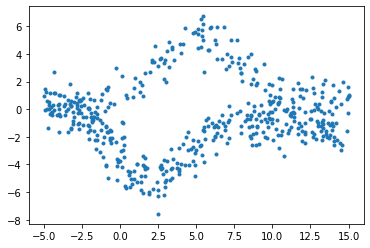

In [3]:
for X, y in train_loader:
    plt.scatter(X,y, marker=".", color="C0")

In [4]:
#net = SplineAutoregressiveModel(1,1, bound=20, num_transforms=1, count_bins=20)
net = MixtureDiagGaussianModel(1,1, num_components=4)
loss_fn = NLLLoss(net)

In [5]:
optim = torch.optim.Adam(net.parameters())

for i in range(300):
    for X,Y in train_loader:
        optim.zero_grad()
        loss = loss_fn(X,Y)
        loss.backward()
        optim.step()
    print(loss)



tensor([3.1465], grad_fn=<AddBackward0>)
tensor([3.5222], grad_fn=<AddBackward0>)
tensor([3.0397], grad_fn=<AddBackward0>)
tensor([3.4128], grad_fn=<AddBackward0>)
tensor([2.6008], grad_fn=<AddBackward0>)
tensor([2.5215], grad_fn=<AddBackward0>)
tensor([2.6719], grad_fn=<AddBackward0>)
tensor([2.6405], grad_fn=<AddBackward0>)
tensor([2.6074], grad_fn=<AddBackward0>)
tensor([2.4294], grad_fn=<AddBackward0>)
tensor([2.3329], grad_fn=<AddBackward0>)
tensor([2.3141], grad_fn=<AddBackward0>)
tensor([2.4897], grad_fn=<AddBackward0>)
tensor([2.1454], grad_fn=<AddBackward0>)
tensor([2.3405], grad_fn=<AddBackward0>)
tensor([2.2141], grad_fn=<AddBackward0>)
tensor([2.2081], grad_fn=<AddBackward0>)
tensor([2.1568], grad_fn=<AddBackward0>)
tensor([2.2286], grad_fn=<AddBackward0>)
tensor([2.3422], grad_fn=<AddBackward0>)
tensor([2.2558], grad_fn=<AddBackward0>)
tensor([2.4108], grad_fn=<AddBackward0>)
tensor([2.3140], grad_fn=<AddBackward0>)
tensor([2.3165], grad_fn=<AddBackward0>)
tensor([2.1067],

In [6]:
#net2 = SplineAutoregressiveModel(1,1, bound=20, num_transforms=1, count_bins=20)
net2 = MixtureDiagGaussianModel(1,1, num_components=4)
loss_fn = NLLLoss(net2)
defense = GaussianNoiseJacobiRegularizer(net2, loss_fn, 0.8, fisher_mc_samples=100)
# defense = GaussianNoiseTransformRegularizer(net2, loss_fn, 0.5, mc_samples=20)
defense.activate()

In [7]:
optim = torch.optim.Adam(net2.parameters())

for i in range(300):
    for X,Y in train_loader:
        optim.zero_grad()
        loss = loss_fn(X,Y)
        loss.backward()
        optim.step()
    print(loss)

tensor([3.4250], grad_fn=<AddBackward0>)
tensor([2.9662], grad_fn=<AddBackward0>)
tensor([3.0064], grad_fn=<AddBackward0>)
tensor([3.0181], grad_fn=<AddBackward0>)
tensor([2.7016], grad_fn=<AddBackward0>)
tensor([2.6880], grad_fn=<AddBackward0>)
tensor([2.8026], grad_fn=<AddBackward0>)
tensor([2.8584], grad_fn=<AddBackward0>)
tensor([2.5612], grad_fn=<AddBackward0>)
tensor([2.4835], grad_fn=<AddBackward0>)
tensor([2.3493], grad_fn=<AddBackward0>)
tensor([2.3231], grad_fn=<AddBackward0>)
tensor([2.3654], grad_fn=<AddBackward0>)
tensor([2.2667], grad_fn=<AddBackward0>)
tensor([2.3595], grad_fn=<AddBackward0>)
tensor([2.5250], grad_fn=<AddBackward0>)
tensor([2.3946], grad_fn=<AddBackward0>)
tensor([2.4232], grad_fn=<AddBackward0>)
tensor([2.1662], grad_fn=<AddBackward0>)
tensor([2.2133], grad_fn=<AddBackward0>)
tensor([2.1661], grad_fn=<AddBackward0>)
tensor([2.1543], grad_fn=<AddBackward0>)
tensor([2.1493], grad_fn=<AddBackward0>)
tensor([2.2499], grad_fn=<AddBackward0>)
tensor([2.1344],

In [8]:
from rbi.defenses.regularized_pre_loss import IntervalBoundPropagation
from rbi.utils.interval import Symbolic_interval
net3 = MixtureDiagGaussianModel(1,1, num_components=4)
loss_fn = NLLLoss(net3)
defense = IntervalBoundPropagation(net3, loss_fn, eps=0.3, interval_reduction="upper")
defense.activate()

In [9]:
optim = torch.optim.Adam(net3.parameters())

for i in range(300):
    for X,Y in train_loader:
        optim.zero_grad()
        loss = loss_fn(X,Y)
        loss.backward()
        optim.step()
    print(loss)

tensor([3.8291], grad_fn=<AddBackward0>)
tensor([3.5631], grad_fn=<AddBackward0>)
tensor([3.8199], grad_fn=<AddBackward0>)
tensor([3.1795], grad_fn=<AddBackward0>)
tensor([3.0354], grad_fn=<AddBackward0>)
tensor([3.4283], grad_fn=<AddBackward0>)
tensor([2.8804], grad_fn=<AddBackward0>)
tensor([2.5549], grad_fn=<AddBackward0>)
tensor([2.5377], grad_fn=<AddBackward0>)
tensor([2.4993], grad_fn=<AddBackward0>)
tensor([2.3686], grad_fn=<AddBackward0>)
tensor([2.5037], grad_fn=<AddBackward0>)
tensor([2.6642], grad_fn=<AddBackward0>)
tensor([2.4765], grad_fn=<AddBackward0>)
tensor([2.3546], grad_fn=<AddBackward0>)
tensor([2.3912], grad_fn=<AddBackward0>)
tensor([2.2886], grad_fn=<AddBackward0>)
tensor([2.3610], grad_fn=<AddBackward0>)
tensor([2.5204], grad_fn=<AddBackward0>)
tensor([2.2365], grad_fn=<AddBackward0>)
tensor([2.5736], grad_fn=<AddBackward0>)
tensor([2.2901], grad_fn=<AddBackward0>)
tensor([2.2243], grad_fn=<AddBackward0>)
tensor([2.3072], grad_fn=<AddBackward0>)
tensor([2.2589],

In [10]:
from rbi.utils.nets import ParametricProbabilisticModel
from torch.distributions import Independent
X = torch.linspace(-5,15, 500).reshape(-1,1)

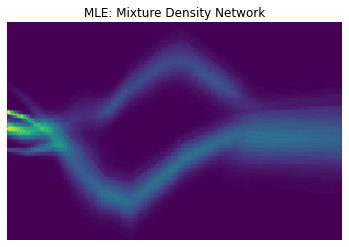

In [16]:

Y1 = net(X).sample((5000,)).reshape(-1,1)
plt.hexbin(X.repeat(5000,1),Y1)
plt.ylim(-8,8)
plt.xlim(-5,15)
plt.title("MLE: Mixture Density Network")
plt.axis("off")
plt.savefig("mle_density.png")

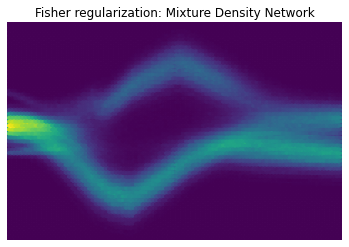

In [15]:
Y2 = net2(X).sample((5000,)).reshape(-1,1)
plt.hexbin(X.repeat(5000,1),Y2)
plt.ylim(-8,8)
plt.xlim(-5,15)
plt.title("Fisher regularization: Mixture Density Network")
plt.axis("off")
plt.savefig("Fisher_density.png")

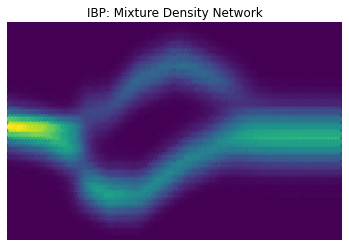

In [14]:
X = torch.linspace(-5,15, 500).reshape(-1,1)
Y3 = net3(X).sample((5000,)).reshape(-1,1)
plt.hexbin(X.repeat(5000,1),Y3)
plt.ylim(-8,8)
plt.xlim(-5,15)
plt.title("IBP: Mixture Density Network")
plt.axis("off")
plt.savefig("IBP_density.png")

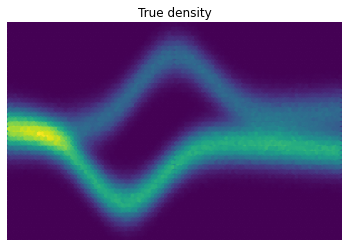

In [17]:
Y_target = reference(X.flatten()).sample((5000,)).reshape(-1, 1)
plt.hexbin(X.repeat(5000, 1),Y_target)
plt.ylim(-8,8)
plt.xlim(-5,15)
plt.title("True density")
plt.axis("off")
plt.savefig("true_density.png")

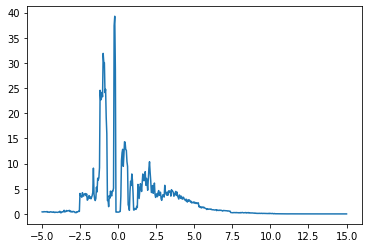

In [12]:
from rbi.utils.fisher_info import monte_carlo_fisher

F_x1 = monte_carlo_fisher(X, net, mc_samples=1000, create_graph=False)
plt.plot(X, F_x1.squeeze())

(0.0, 40.0)

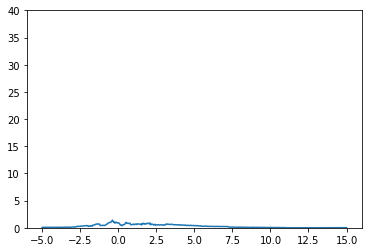

In [32]:
F_x2 = monte_carlo_fisher(X, net2, mc_samples=1000, create_graph=False)
plt.plot(X, F_x2.squeeze())
plt.ylim(0, 40)

In [15]:
# Good figure
from tueplots import bundles

bundles.neurips2021()

{'text.usetex': True,
 'font.family': 'serif',
 'text.latex.preamble': '\\renewcommand{\\rmdefault}{ptm}\\renewcommand{\\sfdefault}{phv}',
 'figure.figsize': (5.5, 3.399186938124422),
 'figure.constrained_layout.use': True,
 'figure.autolayout': False,
 'font.size': 9,
 'axes.labelsize': 9,
 'legend.fontsize': 7,
 'xtick.labelsize': 7,
 'ytick.labelsize': 7,
 'axes.titlesize': 9}

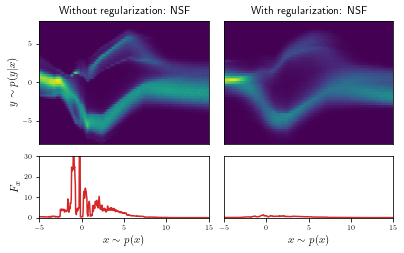

In [34]:
with plt.rc_context(bundles.neurips2022(nrows=2, ncols=2)):
    fig, axes = plt.subplots(2, 2, gridspec_kw={"height_ratios": [1, 0.5]})


    axes[0,1].set_xlim(-5,15)
    axes[0,1].set_ylim(-8, 8)
    axes[0,0].set_xlim(-5,15)
    axes[0,0].set_ylim(-8, 8)

    
    axes[0,0].set_title("Without regularization: NSF", fontsize=11)
    axes[0,0].hexbin(X.repeat(10000,1),Y1)
    axes[0,1].set_title("With regularization: NSF", fontsize=11)
    axes[0,1].hexbin(X.repeat(10000,1),Y2)
    axes[0,0].set_xticks([])
    axes[0,1].set_xticks([])
    axes[0,1].set_yticks([])
    axes[0,0].set_ylabel(r"$y \sim p(y|x)$", fontsize=11)

    axes[1,0].plot(X, F_x1.squeeze(), color="C3")
    axes[1,1].plot(X, F_x2.squeeze(), color="C3")
    axes[1,0].set_xlim(-5,15)
    axes[1,0].set_ylim(0,30)
    axes[1,1].set_xlim(-5,15)
    axes[1,1].set_ylim(0,30)
    axes[1, 0].set_ylabel(r"$F_x$", fontsize=11)
    axes[1,1].set_yticks([])
    axes[1, 1].set_xlabel(r"$x \sim p(x)$", fontsize=11)
    axes[1, 0].set_xlabel(r"$x \sim p(x)$", fontsize=11)
    fig.savefig("NSF_regression_example_smaller.svg")


IndexError: index 2 is out of bounds for axis 0 with size 2

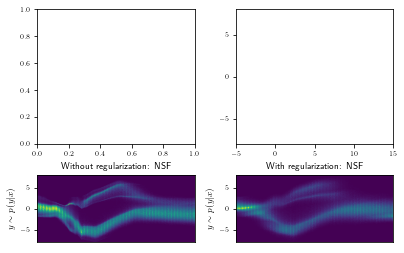

In [23]:
with plt.rc_context(bundles.neurips2022(nrows=3, ncols=2)):
    fig, axes = plt.subplots(3, 2, gridspec_kw={"height_ratios": [2,2, 1]})
    # for X_train, y in train_loader:
    #     axes[0,0].scatter(X_train,y, marker=".", color="black", s=8)
    # axes[0,0].set_title("Train data")
    # axes[0,0].set_xlim(-5,15)
    # axes[0,0].set_ylim(-8, 8)
    # axes[0,1].hexbin(X.repeat(10000, 1),Y_target)
    # axes[0,1].set_title("Ground truth")
    # axes[0,0].set_ylabel(r"$y \sim p(y|x)$")
    # axes[0,1].set_ylabel(r"$y \sim p(y|x)$")
    # axes[0,0].set_xlabel(r"$x \sim p(x)$")
    # axes[0,1].set_xlabel(r"$x \sim p(x)$")

    axes[0,1].set_xlim(-5,15)
    axes[0,1].set_ylim(-8, 8)
    axes[1,0].set_xlim(-5,15)
    axes[1,0].set_ylim(-8, 8)
    axes[1,1].set_xlim(-5,15)
    axes[1,1].set_ylim(-8, 8)
    
    axes[1,0].set_title("Without regularization: NSF")
    axes[1,0].hexbin(X.repeat(10000,1),Y1, gridsize=(150,150))
    axes[1,1].set_title("With regularization: NSF")
    axes[1,1].hexbin(X.repeat(10000,1),Y2, gridsize=(150,150))
    axes[1,0].set_xticks([])
    axes[1,1].set_xticks([])
    axes[1,0].set_ylabel(r"$y \sim p(y|x)$")
    axes[1,1].set_ylabel(r"$y \sim p(y|x)$")

    axes[2,0].plot(X, F_x1.squeeze(), color="C3")
    axes[2,1].plot(X, F_x2.squeeze(), color="C3")
    axes[2,0].set_xlim(-5,15)
    axes[2,0].set_ylim(0,30)
    axes[2,1].set_xlim(-5,15)
    axes[2,1].set_ylim(0,30)
    axes[2, 0].set_ylabel(r"$F_x$")
    axes[2, 1].set_xlabel(r"$x \sim p(x)$")
    axes[2, 0].set_xlabel(r"$x \sim p(x)$")
    #fig.savefig("NSF_regression_example.svg")


In [112]:
from rbi.utils.autograd_tools import batch_jacobian

In [ ]:
Y = torch.linspace(-8, 8, 500).reshape(1,-1)

In [141]:
torch.linalg.matrix_norm(net.t0.nn.layers[0].weight, ord=2)

tensor(3.0395, grad_fn=<CopyBackwards>)

In [138]:
torch.linalg.matrix_norm(net2.t0.nn.layers[2].weight, ord=2)

tensor(2.4571, grad_fn=<CopyBackwards>)

In [120]:
net.t0.condition(torch.ones)(X)

tensor([[-2.0538],
        [-2.0580],
        [-2.0622],
        [-2.0663],
        [-2.0705],
        [-2.0746],
        [-2.0787],
        [-2.0828],
        [-2.0869],
        [-2.0909],
        [-2.0949],
        [-2.0990],
        [-2.1029],
        [-2.1069],
        [-2.1109],
        [-2.1148],
        [-2.1187],
        [-2.1225],
        [-2.1263],
        [-2.1302],
        [-2.1339],
        [-2.1377],
        [-2.1414],
        [-2.1450],
        [-2.1486],
        [-2.1522],
        [-2.1558],
        [-2.1541],
        [-2.1510],
        [-2.1481],
        [-2.1454],
        [-2.1430],
        [-2.1408],
        [-2.1389],
        [-2.1372],
        [-2.1356],
        [-2.1342],
        [-2.1330],
        [-2.1321],
        [-2.1315],
        [-2.1312],
        [-2.1311],
        [-2.1313],
        [-2.1318],
        [-2.1325],
        [-2.1262],
        [-2.1110],
        [-2.0961],
        [-2.0816],
        [-2.0674],
        [-2.0536],
        [-2.0400],
        [-2.

In [70]:
from rbi.attacks.custom_attacks import WhiteNoiseAttack 
from rbi.attacks.advertorch_attack import L2PGDAttack
from rbi.visualization.robustness_eval_plots import plot_metric_for_pertubation_scales
from rbi.metrics.empirical_metrics import EmpiricalLossMetric

ImportError: cannot import name 'EmpiricalLossMetric' from 'rbi.metrics.empirical_metrics' (c:\users\manug\onedrive\uni\phd\rbi\rbi\metrics\empirical_metrics.py)

In [71]:
metric1 = EmpiricalLossMetric(net, WhiteNoiseAttack(0.1), loss_fn)
metric2 = EmpiricalLossMetric(net2, WhiteNoiseAttack(0.1), loss_fn)

NameError: name 'EmpiricalLossMetric' is not defined

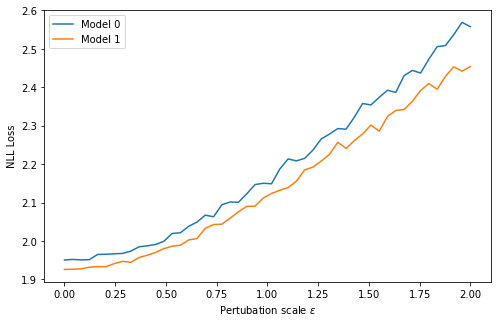

In [14]:
fig = plot_metric_for_pertubation_scales(torch.linspace(0, 2, 50), [metric1, metric2], test_loader)

In [15]:
net.prediction_fn = "dist"
net2.prediction_fn = "dist"

In [16]:
attack1 = L2PGDAttack(net.predict, loss_fn._loss, 0.1)
attack2 = L2PGDAttack(net2.predict, loss_fn._loss, 0.1)
attack1.targeted=True
attack2.targeted=True

In [17]:
metric1 = EmpiricalLossMetric(net, attack1, loss_fn)
metric2 = EmpiricalLossMetric(net2, attack2, loss_fn)

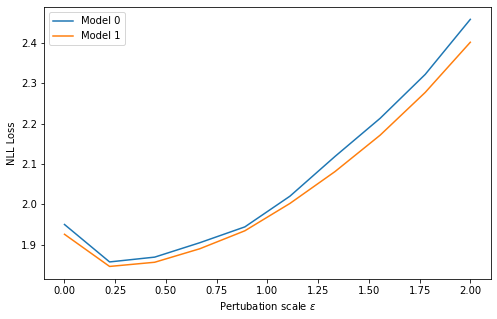

In [18]:
fig = plot_metric_for_pertubation_scales(torch.linspace(0.0001, 2, 10), [metric1, metric2], test_loader)